# <p style="text-align:center; color:Blue; font-size:1.5em"> Sale Price Prediction using Python</p>
<img src='./Sales.png' style='height: 270px; width:1000px'>

### Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

### Retrieving dataset

In [3]:
sale_df = pd.read_csv("Advertising.csv")
sale_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Drop Useless Columns

In [4]:
sale_df.drop(columns=["Unnamed: 0"], inplace=True)
sale_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA (Exploratory Data Analysis)

In [5]:
sale_df.shape

(200, 4)

In [6]:
sale_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sale_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Outliers in Each Features

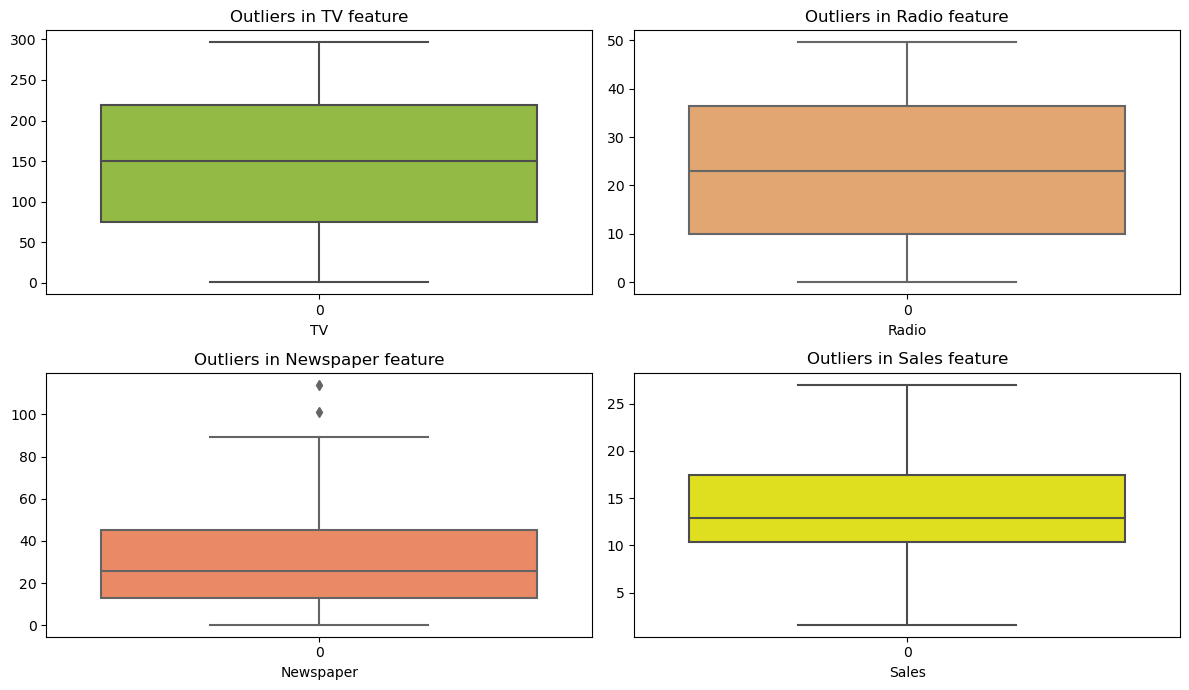

In [37]:
plt.figure(figsize=(12, 7))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}
colors = ["yellowgreen", "sandybrown", "coral", "yellow" ]

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=sale_df[col_name],color=colors[plot])
    plt.xlabel(col_name)
    plt.title(f"Outliers in {col_name} feature")

plt.tight_layout()

#### Kernal Density Plot

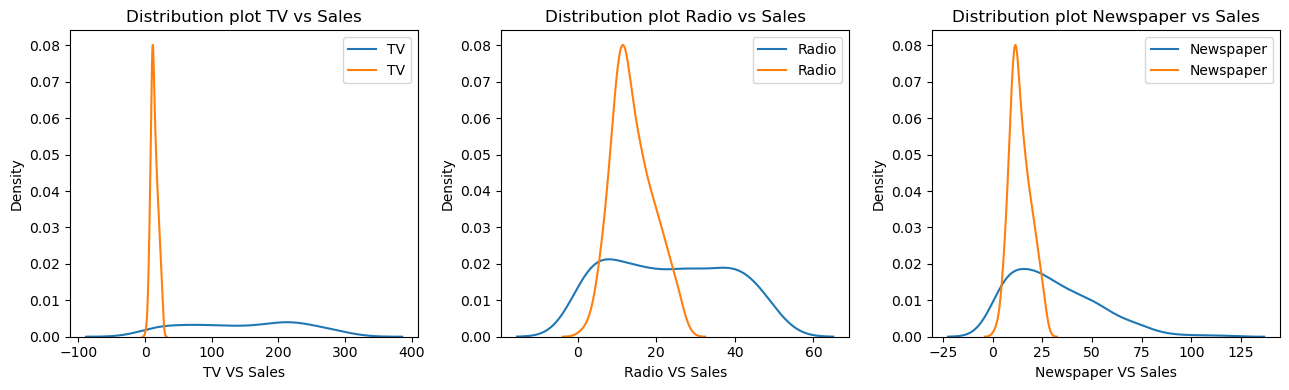

In [115]:
plt.figure(figsize=(13, 4))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.kdeplot(x=col_name, data=sale_df, label=col_name)
    sns.kdeplot(x="Sales", data=sale_df, label=col_name)
    
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title(f"Distribution plot {col_name} vs Sales")
    plt.legend()
    
plt.tight_layout()

#### Scatter Plot

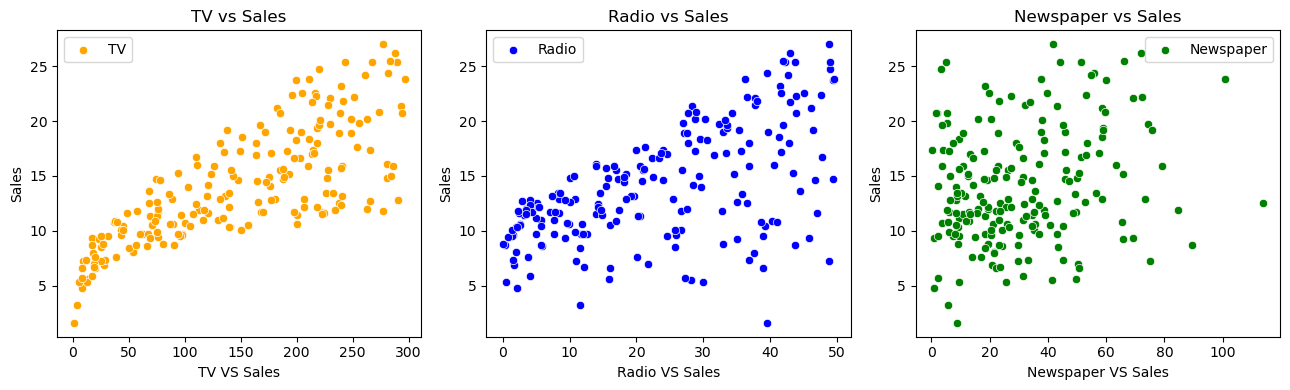

In [116]:
plt.figure(figsize=(13, 4))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}
colors = ["Orange", "Blue", "Green"]

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=col_name, y="Sales", data=sale_df, label=col_name, color=colors[plot])

    plt.xlabel("{} VS Sales".format(col_name))
    plt.title(f"{col_name} vs Sales")
    plt.legend()
    
plt.tight_layout()

#### HeatMap

<AxesSubplot:>

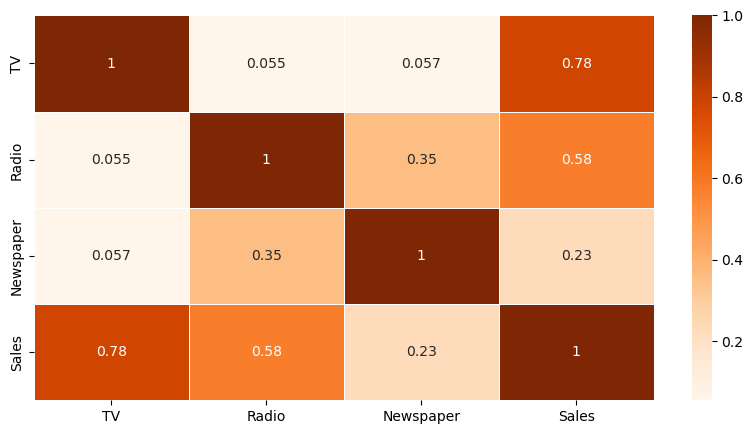

In [99]:
plt.figure(figsize=(10, 5))
sns.heatmap(sale_df.corr(), linecolor = 'white', linewidths = 0.5, annot = True, cmap="Oranges")

## Model Training

#### Loading ML Libraries

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#### Dividing data into dependent and independent features

In [123]:
X = sale_df.iloc[:, :-1]
y = sale_df.iloc[:, -1]

#### Dividing data into training and testing set

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


#### ML Models

In [128]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

In [142]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    R2_score = (r2_score(y_test, y_pred)*100).round(3) 
    MSE = mean_squared_error(y_test, y_pred).round(3)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores = ((cv_scores.mean())*100).round(3)
    
    print(f"{name} \n R2 Score: {R2_score}% \n MSE: {MSE} \n Cross-Validation R2: {cv_scores}%\n")

Linear Regression 
 R2 Score: 85.764% 
 MSE: 4.012 
 Cross-Validation R2: 89.935%

Ridge Regression 
 R2 Score: 85.764% 
 MSE: 4.012 
 Cross-Validation R2: 89.935%

Lasso Regression 
 R2 Score: 86.073% 
 MSE: 3.925 
 Cross-Validation R2: 90.011%

Decision Tree 
 R2 Score: 91.821% 
 MSE: 2.305 
 Cross-Validation R2: 92.409%

Random Forest 
 R2 Score: 96.471% 
 MSE: 0.995 
 Cross-Validation R2: 96.867%



Random Forest Perform best with R2 Score = 96.867 and MSE = 0.995

## Model Testing

In [143]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [149]:
tv = 54
radio = 20
news = 16

data = pd.DataFrame( {"TV": [tv], "Radio": [radio], "Newspaper": [news]} )

pred = rf.predict(data)

print(f"Predicted Sales : {pred}")

Predicted Sales : [10.636]
